# Chapter 5. Categorizing and Tagging Words

## 학습 목표
1. Lexical category(or Part-of-speech, 품사)는 무엇이고, NLP에서 어떻게 사용되는가?

2. Python에서 단어들과 품사를 저장하기 좋은 자료 구조는 무엇인가?

3. 각 단어의 text와 품사를 어떻게 자동적으로 tagging 할 것인가?

단어를 품사로 분류하고 그에 따라 labeling하는 과정을 흔히 품사(part-of-speech) tagging , POS-tagging 또는 단순히 tagging으로 알려져 있다. 품사는 word classes 또는 lexical categories라고도 한다. 특정 작업에 사용되는 태그 모음을 tagset이라고 한다. 이 챕터에서 강조하는 것은 태그를 사용하고 자동으로 텍스트에 태그를 지정하는 것이다.

# 1. Using a Tagger

In [107]:
%autosave 300
import nltk

Autosaving every 300 seconds


In [3]:
text = nltk.word_tokenize("And now for something completely different")

In [4]:
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

여기서 __and__는 CC(접속사), __now__와 __completely__는 RB(부사), __for__은 IN(전치사), __something__은 NN(명사), 그리고 __different__는 JJ(형용사)다.

다른 동음 이의어를 포함하는 다른 예를 살펴보자.

In [7]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")

In [8]:
text

['They',
 'refuse',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [9]:
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

여기서 __refuse__, __permit__은 VBP(현재 동사)와 NN(명사) 둘 다 표시되었다. 어떻게 읽는지에 따라 동사인지, 명사인지 구분되기 때문에 엄밀히 말하면 동음 이의어가 아니다.    

"명사"와 같은 어휘 범주와 NN 과 같은 품사 태그는 용도가 있는 것처럼 보이지만 세부 사항은 많은 사람들에게 애매하다. 이 추가적인 수준의 정보를 제공할 때 어떤 정당성이 있는지 궁금해 할 것이다. 이러한 범주의 대부분은 텍스트에서의 단어 분포에 대한 표면 분석에서 비롯다. text.similar() 메쏘드는 단어 w가 포함된 모든 문맥 w1_w_w2를 찾은 다음, 동일한 문맥에서 나타나는 모든 단어 w', 즉 w1_w'_w2를 찾는다.

In [15]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
print(text.similar('woman'))
print(text.similar('bought'))
print(text.similar('over'))
print(text.similar('the'))

man time day year car moment world family house boy child country job
state place girl way war question work
None
made done said put found had seen given left heard brought got was
been set told that took called in
None
in on to of and for with from at by that into as up out down through
all is about
None
a his this their its her an that our any all one these my in your no
some other and
None


# 2. Tagged Corpora

## 2.1. Representing Tagged Tokens
NLTK의 convention에 따라 tag가 있는 token은 (token, tag)의 tuple 형태로 표현된다.

In [17]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [21]:
tagged_token[0]

'fly'

함수 str2tuple()을 사용하여 태그가 지정된 토큰의 문자열(string)에서 이러한 특수 튜플 중 하나를 만들 수 있습니다.

In [22]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''

In [23]:
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

## 2.2. Reading Tagged Corpora

NLTK에 포함되어 있는 몇몇 corpus는 그들의 품사용 태그가 붙어있다. corpus를 제공하는 회사에 따라 다른 방식으로 POS가 달려있을 수 있는데, 별로 중요한 내용같지는 않음.

In [25]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [26]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [27]:
print(nltk.corpus.nps_chat.tagged_words())

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


In [28]:
nltk.corpus.conll2000.tagged_words()

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [30]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

## 2.3   A Universal Part-of-Speech Tagset

범용적으로 사용되는 tag와 그 의미

![Table 2.1](image/T2.1.PNG)

In [5]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [4]:
nltk.download_gui()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


아래 코드를 실행하면 concordance를 GUI로 검색해볼 수 있다.

In [7]:
nltk.app.concordance()

## 2.4. Nouns

명사는 일반적으로 여성, 스코틀랜드, 도서, 지능과 같이 사람, 장소, 사물 또는 개념을 나타낸다. 명사는 결정자와 형용사 뒤에 나타날 수 있으며 2.2 에서 보여지는 바와 같이 동사의 주체 또는 대상이 될 수 있다.

![Table 2.1](image/T2.2.PNG)

명사 앞에 어떤 품사가 있는지 알아보기 위해 태그가있는 텍스트를 검사 해보자. 가장 자주 나오는 명사를 먼저 사용한다. 먼저 (( 'The' , 'DET' ), ( 'Fulton' , 'NP' ))와 같은 word-tag 쌍을 멤버로 갖는 bigram 목록을 구성한다. 그런 다음 bigram의 태그 부분에서 FreqDist를 생성한다.

In [3]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
noun_preceders

NameError: name 'brown_news_tagged' is not defined

In [ ]:
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

## 2.5. Verbs

동사는 사건과 행동을 묘사하는 단어이며, 일반적으로 하나 이상의 명사구의 대상을 포함하는 관계를 표현한다. 뉴스 텍스트에서 가장 흔히 사용되는 동사들은 무엇일까?

In [5]:
wsj = nltk.corpus.treebank.tagged_words (tagset = 'universal' )
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']

['is',
 'said',
 'was',
 'are',
 'be',
 'has',
 'have',
 'will',
 'says',
 'would',
 'were',
 'had',
 'been',
 'could',
 "'s",
 'can',
 'do',
 'say',
 'make',
 'may',
 'did',
 'rose',
 'made',
 'does',
 'expected',
 'buy',
 'take',
 'get',
 'might',
 'sell',
 'added',
 'sold',
 'help',
 'including',
 'should',
 'reported',
 'according',
 'pay',
 'compared',
 'being',
 'fell',
 'began',
 'based',
 'used',
 'closed',
 "'re",
 'want',
 'see',
 'took',
 'yield',
 'offered',
 'set',
 'priced',
 'approved',
 'come',
 'noted',
 'cut',
 'ended',
 'found',
 'increased',
 'become',
 'think',
 'named',
 'go',
 'trying',
 'proposed',
 'received',
 'growing',
 'declined',
 'held',
 'give',
 'came',
 'use',
 'put',
 'making',
 'continue',
 'raise',
 'estimated',
 'called',
 'paid',
 'designed',
 'going',
 'expects',
 'seeking',
 'must',
 'plans',
 'wo',
 'increasing',
 'saying',
 'got',
 'owns',
 'trading',
 'acquired',
 'gained',
 'fined',
 'reached',
 'holding',
 'announced',
 'filed',
 'became',


In [6]:
word_tag_fd.most_common()

[((',', '.'), 4885),
 (('the', 'DET'), 4038),
 (('.', '.'), 3828),
 (('of', 'ADP'), 2319),
 (('to', 'PRT'), 2161),
 (('a', 'DET'), 1874),
 (('in', 'ADP'), 1554),
 (('and', 'CONJ'), 1505),
 (('*-1', 'X'), 1123),
 (('0', 'X'), 1099),
 (('*', 'X'), 965),
 (('for', 'ADP'), 815),
 (('*T*-1', 'X'), 806),
 (("'s", 'PRT'), 761),
 (('*U*', 'X'), 744),
 (('$', '.'), 718),
 (('The', 'DET'), 713),
 (('``', '.'), 702),
 (("''", '.'), 684),
 (('is', 'VERB'), 671),
 (('said', 'VERB'), 628),
 (('that', 'ADP'), 513),
 (('on', 'ADP'), 483),
 (('it', 'PRON'), 476),
 (('%', 'NOUN'), 445),
 (('by', 'ADP'), 427),
 (('at', 'ADP'), 402),
 (('with', 'ADP'), 387),
 (('from', 'ADP'), 386),
 (('million', 'NUM'), 383),
 (('Mr.', 'NOUN'), 375),
 (('*-2', 'X'), 372),
 (('was', 'VERB'), 367),
 (('are', 'VERB'), 367),
 (('be', 'VERB'), 356),
 (('*T*-2', 'X'), 345),
 (('has', 'VERB'), 339),
 (('as', 'ADP'), 333),
 (('its', 'PRON'), 332),
 (("n't", 'ADV'), 325),
 (('have', 'VERB'), 323),
 (('an', 'DET'), 316),
 (('that'

단어가 주어지면 해당 단어가 어떤 품사로 쓰였는지 조건부 빈도수를 구할 수 있다.

In [26]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [27]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

cfd1과는 다르게 tag, word 쌍의 순서를 바꿀 수도 있다.

In [46]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)

In [50]:
print(list(cfd2['VBN']))

['expressed', 'rusted', 'coated', 'dominated', 'purchased', 'subdued', 'considered', 'paid', 'traded', 'vowed', 'assigned', 'magnified', 'attached', 'handled', 'revived', 'bolstered', 'crossed', 'forgiven', 'formed', 'finalized', 'kept', 'attempted', 'scrambled', 'subpoenaed', 'anticipated', 'rated', 'commanded', 'located', 'controlled', 'directed', 'argued', 'Posted', 'stopped', 'achieved', 'expected', 'averted', 'collapsed', 'said', 'released', 'had', 'midsized', 'owed', 'empowered', 'expunged', 'tested', 'perceived', 'superimposed', 'sold', 'grown', 'labeled', 'hunted', 'strapped', 'funded', 'twinned', 'elected', 'supported', 'pursued', 'followed', 'floated', 'turned', 'documented', 'complained', 'killed', 'received', 'impressed', 'enclosed', 'Used', 'reflected', 'forced', 'centralized', 'converted', 'invested', 'attracted', 'vested', 'chosen', 'financed', 'exhausted', 'written', 'rationed', 'signed', 'repaired', 'cast', 'chastised', 'voted', 'Related', 'indicated', 'revised', 'scra

## 2.6. Adjectives and Adverbs

## 2.7. Unsimplified Tags

각 명사 품사유형(NN, NN$, NN-HL 등)에서 가장 빈번한 명사를 찾아보자.

In [59]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

In [60]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))

In [61]:
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('home', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("city's", 6), ("company's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Army's", 3), ("League's", 3), ("Administration's", 3), ("University's", 3)]
NN-HL [('business', 2), ('cut', 2), ('Question', 2), ('war', 2), ('condition', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('Dr.', 41)]
NN-TL-HL [('Fort', 2), ('House', 1), ('Dr.', 1), ('Street', 1), ('Commissioner', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Idols'", 1), ("Dealers'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Officers'", 1), ("Men's", 1)]
NNS-HL [('$12,500', 1), ('plans', 1), ('days', 1), ('peddlers', 1), ('fees', 1)]
NNS-TL [

## 2.8. Exploring Tagged Corpora

우리가 often이라는 단어에 대해서 공부한다고 가정하고 그 단어가 text에서 어떻게 사용되는지 알아보고 싶다고 하자. 이 경우 우리는 often 이후에 오는 단어들을 불러올 수 있을 것이다.

In [62]:
brown_learned_text = brown.words(categories='learned')

In [63]:
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

위에서 사용한 brown.words() 대신 brown.tagged_words()를 사용하는 것이 더 공부하기 좋을 것이다.

In [64]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')

In [65]:
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


자 우리는 더 복잡한 것도 할 수 있어요!

In [66]:
from nltk.corpus import brown
def process(sentence):
    for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)

위의 함수는 '동사 - to - 동사' 패턴인 경우 단어를 해당 trigram을 출력하는 함수다.

In [67]:
for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

이번에는 POS tagging에 있어서 아주 모호한 단어들을 찾아보자.

In [68]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

In [71]:
data = nltk.ConditionalFreqDist((word.lower(), tag) 
                                for (word, tag) in brown_news_tagged)

In [72]:
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

best ADJ VERB NOUN ADV
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV VERB NOUN
that ADP DET PRON ADV


# 3. Mapping Words to Properties Using Python Dictionaries

3.1.  Indexing Lists vs Dictionaries

3.2. Dictionaries in Python

3.3. Defining Dictionaries

3.4. Default Dictionaries

3.5. Incrementally Updating a Dictionary

3.6. Complex Keys and Values

3.7. Inverting a Dictionary

# 4. Automatic Tagging

이 챕터의 나머지 부분에서는 텍스트에 tag를 자동으로 추가하는 다양한 방법을 살펴본다. 한 단어의 tag는 문장 내의 단어와 문맥에 달려있음을 알 수 있다. 이 때문에 우리는 단어가 아닌 (태그가 붙은) 문장의 수준에서 어느 정도의 데이터분석을 가미하여 작업한다. 

In [75]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

## 4.1. The Default Tagger

가장 간단하게 가능한 tagger는 각 토큰에 동일한 tag를 지정한다. 이 단계가 다소 진부해 보일 수 있지만, tagger 성능에 있어서 중요한 baseline을 설정하는 중요한 단계다. 가장 좋은 결과를 내기 위해서, 우리는 가장 그럴법한 tag를 단다.

In [77]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]

In [80]:
nltk.FreqDist(tags).max()

'NN'

이제 우리는 모든 단어에 'NN'을 tagging하는 tagger를 만들 수 있다.

In [83]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

당연히 이 방법은 성능이 다소 떨어진다. 일반적인 corpus에서 약 1/8 정도만 올바르게 tag를 지정하는 것을 알 수 있다.

In [85]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

이렇게 일단 'NN'으로 tagging하는 이유는, 기존에 보지 못했던 새로운 단어들은 명사이기 때문이다. 앞으로 보겠지만, 이것은 default tagger가 language process system의 견고함을 향상시키는데 기여할 수 있음을 의미한다. 이따 봐요.

## 4.2. The Regular Expression Tagger

정규표현식 tagger는 패턴의 일치 여부에 따라 tag를 지정한다. 예를 들어, -ed로 끝나는 단어는 동사의 과거분사, 's로 끝나는 단어는 명사의 소유격이다. 우리는 이것들을 정규표현식의 list로 표현할 수 있다.

In [86]:
patterns = [(r'.*ing$', 'VBG'),               # gerunds
            (r'.*ed$', 'VBD'),                # simple past
            (r'.*es$', 'VBZ'),                # 3rd singular present
            (r'.*ould$', 'MD'),               # modals
            (r'.*\'s$', 'NN$'),               # possessive nouns
            (r'.*s$', 'NNS'),                 # plural nouns
            (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
            (r'.*', 'NN')                     # nouns (default)
           ]

In [88]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [89]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

위 정규표현식들은 list에서 순서가 있기 때문에(index), 가장 먼저 match되는 하나를 반환한다. 이제 약 20%까지 정확도가 올라갔다.

## 4.3. The Lookup Tagger

자주 출현하는 단어 중 많은 단어는 NN이 tag되어 있지 않다. 우선 가장 자주출현하는 단어 100개와 그것들의 most likely tag를 저장하자. 우리는 이 정보를 lookup tagger의 모델로 사용할 수 있다.

In [7]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

NameError: name 'brown' is not defined

가장 자주 나오는 100개의 단어에 대한 tag 정보를 활용하여 많은 수의 토큰에 정확한 tag를 붙일 수 있게 되었다(거의 절반에 가까운 45%). 그렇다면 상위 100 단어가 아닌(즉, tag가 없는 token) 텍스트에서는 어떤 일이 일어나는지 살펴보자.

In [91]:
sent = brown.sents(categories='news')[3]

In [92]:
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

많은 단어가 최빈 100 단어에 속하지 않기 때문에 None이라는 태그가 지정되었다. 이 경우, NN이라는 기본 태그를 지정하려고 한다. 바꿔 말하면, 우선 lookup table을 먼저 탐색하여 tagging을 하고, tagging을 할 수 없는 단어의 경우 default tagger를 적용하는 것이다. 이 과정을 backoff라고 부른다.

In [94]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags, 
                                     backoff=nltk.DefaultTagger('NN'))

In [95]:
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', 'NN'),
 ('a', 'AT'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'IN'),
 ('such', 'NN'),
 ('reports', 'NN'),
 ('was', 'BEDZ'),
 ('received', 'NN'),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', 'NN'),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', 'NN'),
 ('the', 'AT'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', 'NN'),
 (',', ','),
 ('the', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('voters', 'NN'),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', 'NN'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', 'NN'),
 ("''", "''"),
 ('.', '.')]

In [96]:
baseline_tagger.evaluate(brown_tagged_sents)

0.5817769556656125

무려 58%의 정확도로 올라갔다. 우리는 이제 이 모든 것들을 종합하여 특정 규모의 범위에서 lookup tagger들을 생성하고 평가하는 프로그램을 작성할 것이다.

In [97]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

In [98]:
def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

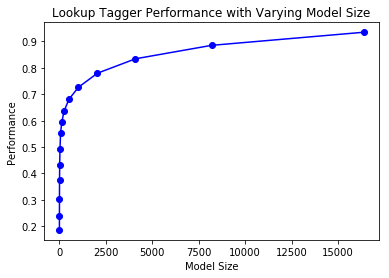

In [99]:
display()

lookup tagger의 성능은 model size가 증가하는 초반에 급격히 개선되고, 어느 순간 고원에 도달하게 된다.

# 5. N-Gram Tagging

## 5.1. Unigram Tagging

unigram tagger는 간단한 통계 알고리즘을 기반으로 한다. 각 토큰마다 특정 토큰에 가장 적합한 tag를 할당하자. 예를 들어, frequent라는 단어는 동사로 쓰이는 경우(e.g. I frequent this cafe)보다 형용사로 쓰이는 경우(e.g. a frequent word)가 더 많기 때문에, frequent에 JJ tag를 달 것이다. 

unigram tagger는 lookup tagger와 비슷하게 작용하지만, training이라고 하는 보다 편리한 설정이 있다. 다음 코드 샘플에서는 unigram tagger를 training 하고 tag를 지정하여 평가한다.

In [109]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [110]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

tagger를 초기화 할 때, tag가 있는 문장 데이터를 parameter로 지정하여 unigram tagger를 학습시킨다. 학습 과정에서는 각 단어의 tag를 검사하고 사전에 있는 모든 단어에 대해 most likely tag를 tagger 내부에 저장한다.

## 5.2. Separating the Training and Testing Data

일부 데이터에서 tagger를 학습시키고 있기 때문에 같은 데이터로 test 하지 않도록 주의해야 한다. 즉, training set, test set을 나눠야 한다.

In [113]:
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8129173726701884

비록 점수는 좀 떨어졌지만, 이제 이 tagger의 유용성에 대한 더 나은 그림을 그릴 수 있게 되었다. i.e. train/test set 을 나눔으로써 이전에 학습하지 못했던 새로운 text에 대한 성능

## 5.3. General N-Gram Tagging

unigram 기반으로 자연어 처리를 할 때, 우리는 문맥에서 한가지 item만을 사용하고 있다. tagging의 경우, 문맥과 분리한 '현재의 토큰'만을 갖고 고려한다. 이러한 모델을 감안할 때 우리가 할 수 있는 최선의 방법은 각 단어에 선험적으로 가장 가능성 있는 tag를 다는 것이다. 이것은 우리가 'the wind'나 'to wind'든 상관 없이 wind의 tag를 다는 것을 의미한다.

![Tagger Context](image/F5.1.png)

n-gram tagger는 n-1개의 선행 단어들의 tag와 더불어 현재의 단어를 문맥으로 갖는, 바꿔 말하면 unigram tagger의 일반화 버전이다.

NgramTagger 클래스는 tag가 지정된 train set corpus를 사용하여 각 문맥에 가장 적합한 tag를 결정한다. 여기서 우리는 n-gram tagger의 특별한 경우, 즉 bigram tagger를 볼 수 있다.

In [115]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [117]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [118]:
bigram_tagger.evaluate(test_sents)

0.10256154689524569

띠로리, 기껏 올렸던 정확도가 10%로 떨어져버렸다.

n이 커질수록 우리가 tagging 하고자 하는 data가 training data에서 보지 못한 문맥을 포함할 가능성이 증가함에 따라 문맥의 specificity는 증가한다.

이러한 현상을 sparse data(희소 데이터) problem이라 하고, NLP 분야에서 상당히 만연한 현상이다. 결과적으로 정확도와 우리 결과의 coverage 사이에 trade-off가 발생한다.

## 5.4.  Combining Taggers

앞서 언급했던 정확도와 coverage 사이의 trade-off를 해결하는 한 가지 방법은, 가능하다면 더 정확한 알고리즘을 사용하되, 필요한 경우에는 더 넓은 범위를 cover할 수 있는 알고리즘으로 fall back 하는 것이다. 지금까지 배운 tagger를 아래와 같이 조합해볼 수 있을 것이다.

1. bigram tagger로 우선 tagging 한다.

2. bigram tagger로 tagging할 수 없었던 토큰은 unigram tagger를 이용하여 tagging한다.

3. unigram tagger로도 tagging할 수 없었던 토큰은 default tagger를 이용한다.

In [119]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8465065284560949

## 5.5. Tagging Unknown Words

unknown word에 대해서 tagging하는 우리의 접근은 여전히 정규표현식 tagger나 default tagger에 머물러 있고 이러한 점은 문맥을 활용할 수 없다. 어떻게 하면 unknown word(out-of-vocabulary items)에 대해 더 나은 접근을 할 수 있을까?

한가지 유용한 방법은, tagger의 vocabulary의 수를 최빈 n 단어로 제한하고, 그 외의 단어들은 UNK로 전부 대체하는 것이다. training 과정에서 unigram tagger는 UNK라는 단어는 일반적으로 명사라는 것을 학습할 것이다. 반면 n-gram tagger는 문맥을 활용하여 다른 tag를 달 수 있는 경우를 고려할 것이다. 예를 들어, 선행하는 단어가 to(TO로 tagging)라면 UNK가 아마 동사로 tagging될 것이다.

## 5.6. Storing Taggers

어마어마한 크기의 corpus로 tagger를 학습시키는 과정은 엄청난 시간을 요할 것이다. 그래서 매번 학습시키기 보다는 학습된 tagger를 file로 저장하여 다음에 재사용할 수 있도록 하는 것이 좋다. 

In [124]:
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

이제 저장한 tagger를 불러올 수 있다.

In [125]:
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

In [126]:
tagger

<BigramTagger: size=3148>

In [127]:
text = """The board's action shows what free enterprise 
is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

## 5.7. Performance Limitations

# 6. Transformation-Based Tagging

N-Gram Tagger 관련 이슈들

1. n-gram table 규모에 대한 이슈(너무 커질 수 있음)

2. 문맥 관련 이슈(선행 단어의 'tag'만을 정보로 활용하고 단어 그 자체는 활용하지 않음)


그리하여, Brill tagging이라는 transformation-based learning의 한 종류가 있다. 아이디어는 간단한데, 단어마다 tag를 달고 되돌아가 실수를 수정하는 것이다. 이러한 방법으로 Brill tagger는 잘못된 tag를 지속적으로 더 나은 tag로 바꾼다. n-gram tagger와 마찬가지로 tagger의 prediction이 정답인지 오답인지 판단하기 위한 정답지가 있는(labeled) training data가 필요하므로 supervised learning이다.

In [129]:
nltk.tag.brill.nltkdemo18()

[Template(Pos([-1])),
 Template(Pos([1])),
 Template(Pos([-2])),
 Template(Pos([2])),
 Template(Pos([-2, -1])),
 Template(Pos([1, 2])),
 Template(Pos([-3, -2, -1])),
 Template(Pos([1, 2, 3])),
 Template(Pos([-1]),Pos([1])),
 Template(Word([-1])),
 Template(Word([1])),
 Template(Word([-2])),
 Template(Word([2])),
 Template(Word([-2, -1])),
 Template(Word([1, 2])),
 Template(Word([-3, -2, -1])),
 Template(Word([1, 2, 3])),
 Template(Word([-1]),Word([1]))]

# 7. How to Determine the Category of a Word

7.1. Morphological Clues

7.2. Syntactic Clues

7.3. Semantic Clues

7.4. New Words

7.5. Morphology in Part of Speech Tagsets